# Call Center Data - Exploratory Data Analysis

This notebook performs comprehensive EDA on the call center dataset to understand patterns, trends, and relationships in the data.

## 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

## 2. Load Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
call_data = "../data/raw/call-center-data-v2-daily.csv"
df = pd.read_csv(call_data, parse_dates=["Date"])

In [4]:
df.set_index("Date", inplace=True)

In [5]:
time_cols = ["Answer Speed (AVG)", "Talk Duration (AVG)", "Waiting Time (AVG)"]
for col in time_cols:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()

## 4. Statistical Summary

In [6]:
df.describe()

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG)
count,1247.00,1247.00,1247.00,1247.00,1247.00,1247.00
mean,202.64,176.94,25.70,24.93,157.60,232.36
std,166.24,115.70,71.71,23.74,23.72,190.81
min,5.00,5.00,0.00,2.00,57.00,3.00
25%,124.00,114.00,3.00,13.00,142.00,118.00
50%,179.00,165.00,9.00,21.00,157.00,182.00
75%,236.00,215.00,19.00,30.00,171.00,276.00
max,1715.00,909.00,844.00,308.00,288.00,1551.00


In [7]:
print("Data Head:")
print(df.head())
print("\nData Info:")
df.info()

Data Head:
            Incoming Calls  Answered Calls  Abandoned Calls  \
Date                                                          
2022-01-01             157             145               12   
2022-01-02              37              37                0   
2022-01-03             317             304               13   
2022-01-04             253             244                9   
2022-01-05             214             205                9   

            Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  
Date                                                                     
2022-01-01                15.0                149.0               192.0  
2022-01-02                 3.0                126.0                35.0  
2022-01-03                18.0                 95.0               157.0  
2022-01-04                13.0                110.0               122.0  
2022-01-05                10.0                130.0               202.0  

Data Info:
<class 'pandas.co

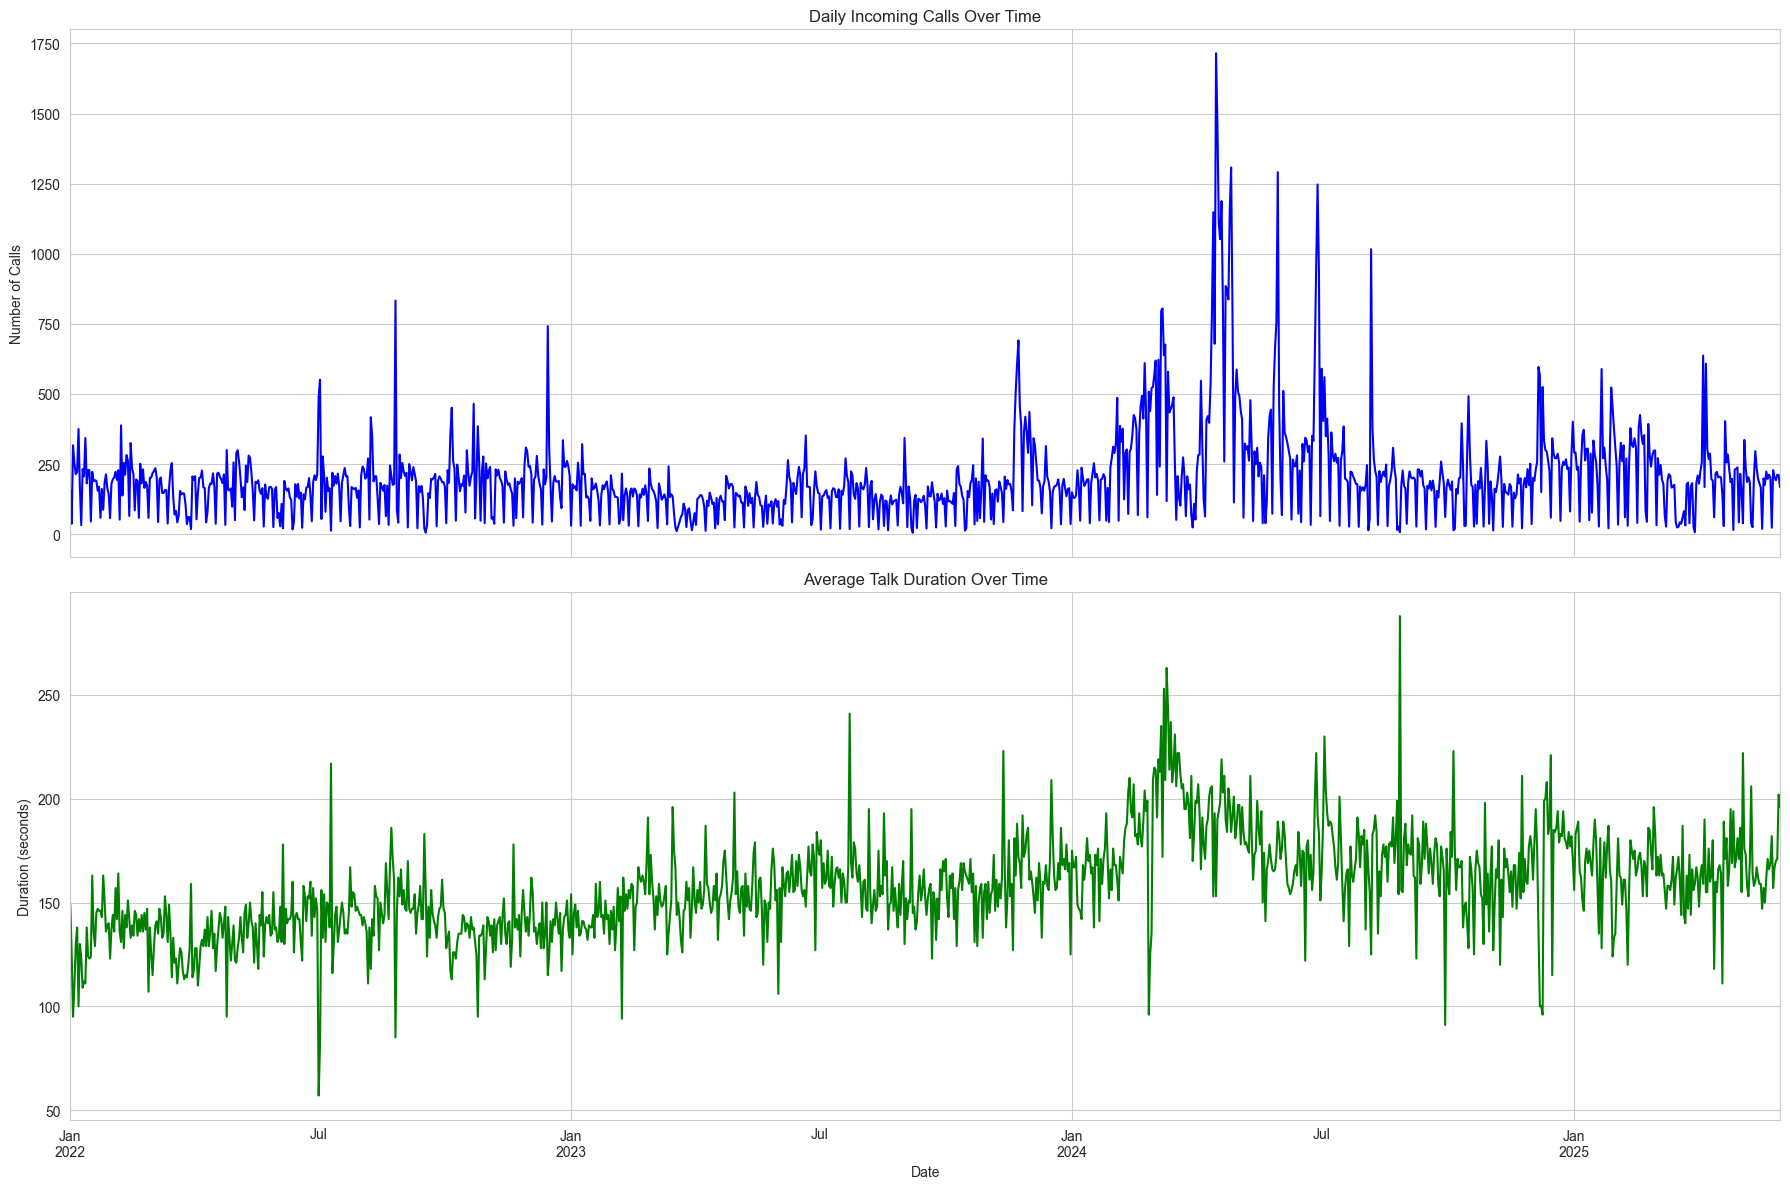

In [ ]:
# Create plots to visualize the two target variables over time
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# Plot Incoming Calls
df["Incoming Calls"].plot(
    ax=axes[0], title="Daily Incoming Calls Over Time", color="blue"
)
axes[0].set_ylabel("Number of Calls")

# Plot Average Talk Duration
df["Talk Duration (AVG)"].plot(
    ax=axes[1], title="Average Talk Duration Over Time", color="green"
)
axes[1].set_ylabel("Duration (seconds)")


plt.xlabel("Date")
plt.tight_layout()
plt.show()

## 3. Basic Dataset Information

In [10]:
# Dataset shape
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"Total days: {(df.index.max() - df.index.min()).days} days")

Dataset shape: (1247, 6)
Number of records: 1247
Number of features: 6

Date range: 2022-01-01 00:00:00 to 2025-05-31 00:00:00
Total days: 1246 days


In [26]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
pct_missing = (total_missing / total_cells) * 100

print(f"\nTotal missing values: {total_missing}")
print(f"Percentage of missing data: {pct_missing:.2f}%")

Missing Values:
Incoming Calls         0
Answered Calls         0
Abandoned Calls        0
Answer Speed (AVG)     0
Talk Duration (AVG)    0
Waiting Time (AVG)     0
DayOfWeek              0
DayName                0
Month                  0
MonthName              0
Quarter                0
Year                   0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


## 5. Distribution Analysis

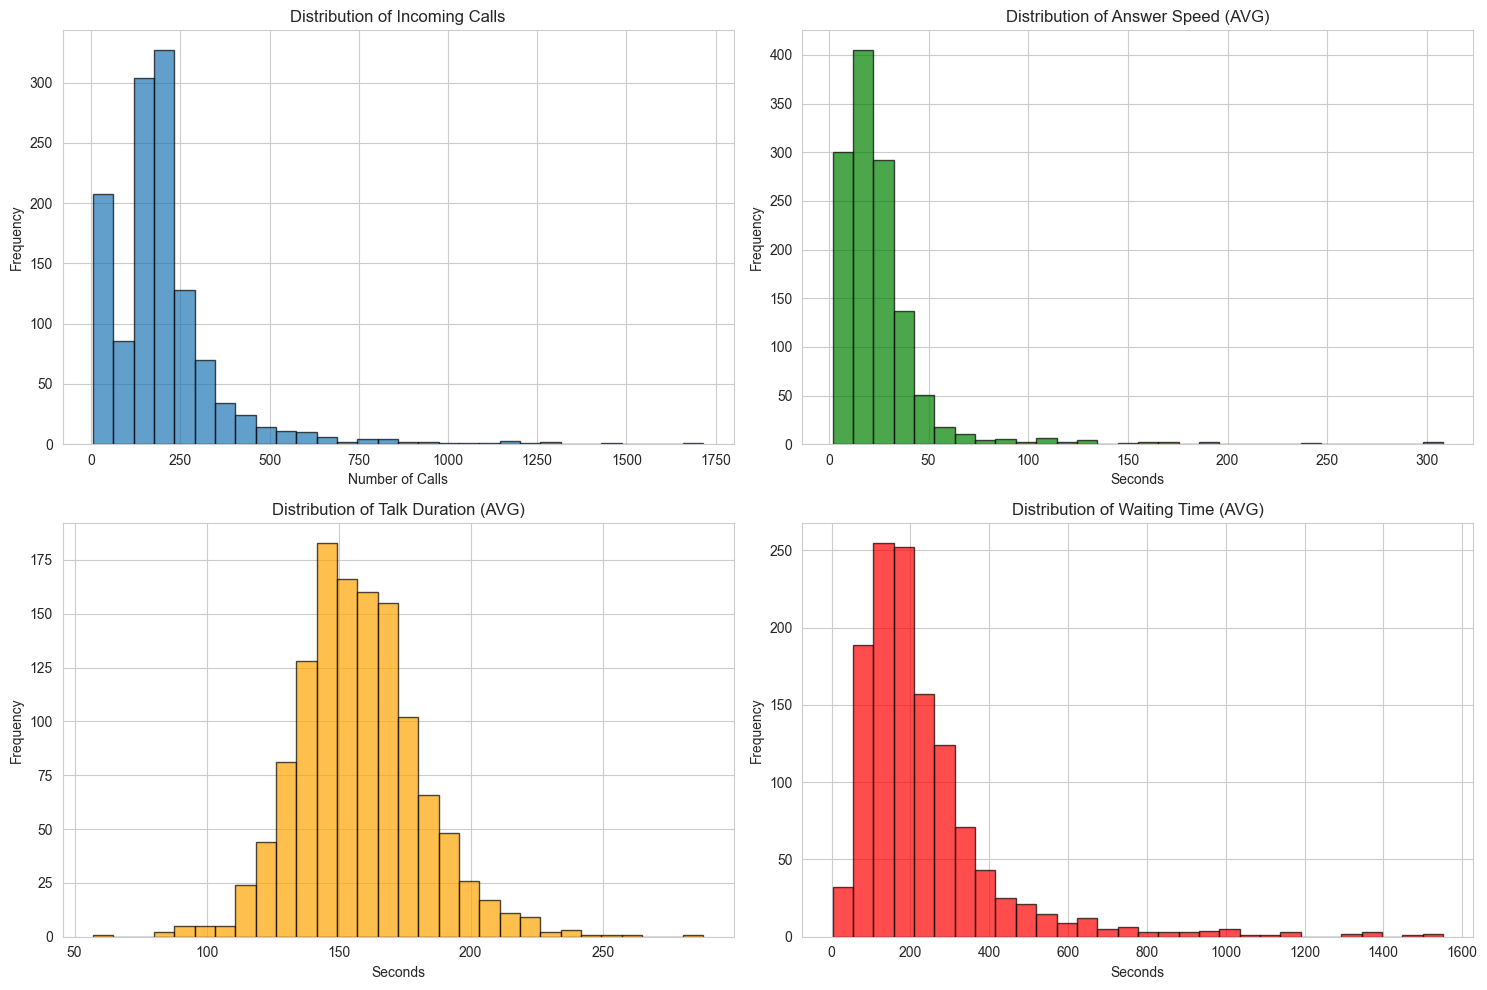

In [13]:
# Distribution plots for key numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Incoming Calls
axes[0, 0].hist(df["Incoming Calls"], bins=30, edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Distribution of Incoming Calls")
axes[0, 0].set_xlabel("Number of Calls")
axes[0, 0].set_ylabel("Frequency")

# Answer Speed
axes[0, 1].hist(
    df["Answer Speed (AVG)"],
    bins=30,
    edgecolor="black",
    alpha=0.7,
    color="green",
)
axes[0, 1].set_title("Distribution of Answer Speed (AVG)")
axes[0, 1].set_xlabel("Seconds")
axes[0, 1].set_ylabel("Frequency")

# Talk Duration
axes[1, 0].hist(
    df["Talk Duration (AVG)"],
    bins=30,
    edgecolor="black",
    alpha=0.7,
    color="orange",
)
axes[1, 0].set_title("Distribution of Talk Duration (AVG)")
axes[1, 0].set_xlabel("Seconds")
axes[1, 0].set_ylabel("Frequency")

# Waiting Time
axes[1, 1].hist(
    df["Waiting Time (AVG)"],
    bins=30,
    edgecolor="black",
    alpha=0.7,
    color="red",
)
axes[1, 1].set_title("Distribution of Waiting Time (AVG)")
axes[1, 1].set_xlabel("Seconds")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

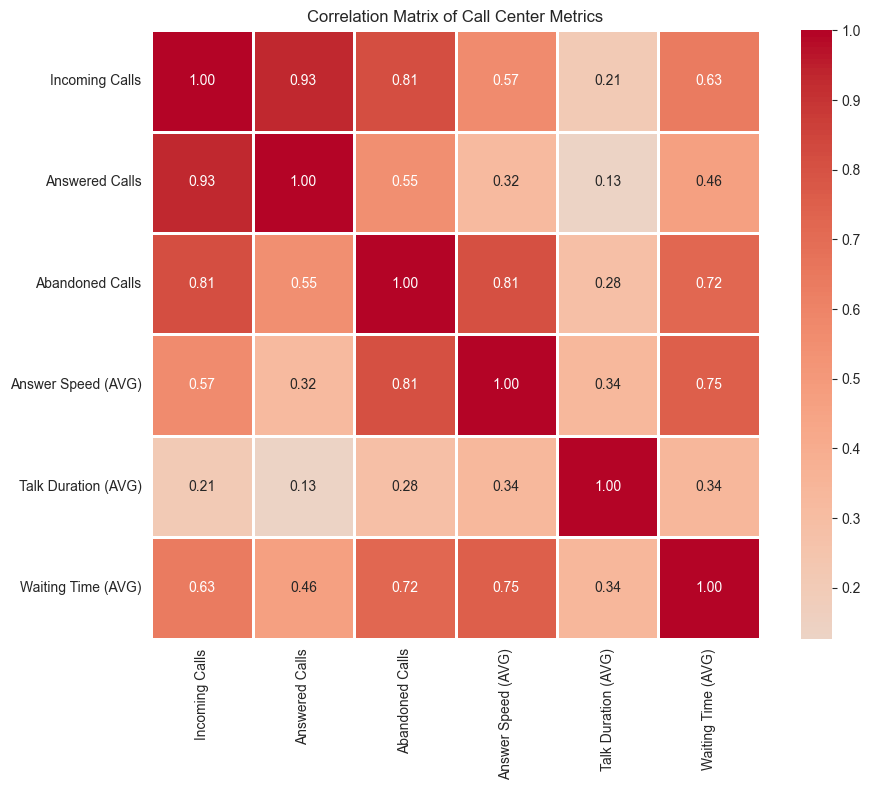


Top Positive Correlations (excluding diagonal):
Answered Calls   Incoming Calls        0.93
Incoming Calls   Answered Calls        0.93
                 Abandoned Calls       0.81
Abandoned Calls  Incoming Calls        0.81
                 Answer Speed (AVG)    0.81
dtype: float64


In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=1,
)
plt.title("Correlation Matrix of Call Center Metrics")
plt.tight_layout()
plt.show()

# Print top correlations
print("\nTop Positive Correlations (excluding diagonal):")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
# Remove duplicates and self-correlations
top_corrs = sorted_pairs[(sorted_pairs < 1) & (sorted_pairs > 0)].head(5)
print(top_corrs)

Incoming Calls and Answered Calls .93
- when more calls come in, more are answered (obvious)

Incoming Calls and Abandoned Calls .81
- call volumn increases, more calls are abandoned (more demands for our agents)

Abandoned Calls and answer speed .81
higer avg answer speed (longer delay) leads to more abandoned calls

Answer Speed (AVG) to waiting time (avg) .75
- longer calls = higher wait time

Talk Duration (avg)
- how long agents talk dont correlate with the number of incoming calls or answered calls

## 7. Advanced Time Series Decomposition

Time series decomposition helps us understand the underlying patterns in our data by breaking it down into:
- **Trend**: Long-term direction of the data
- **Seasonal**: Regular, recurring patterns
- **Residual**: Random noise or irregular components

In [15]:
# Import additional libraries for time series analysis
import warnings

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

warnings.filterwarnings("ignore")

### 7.1 Decomposition of Incoming Calls

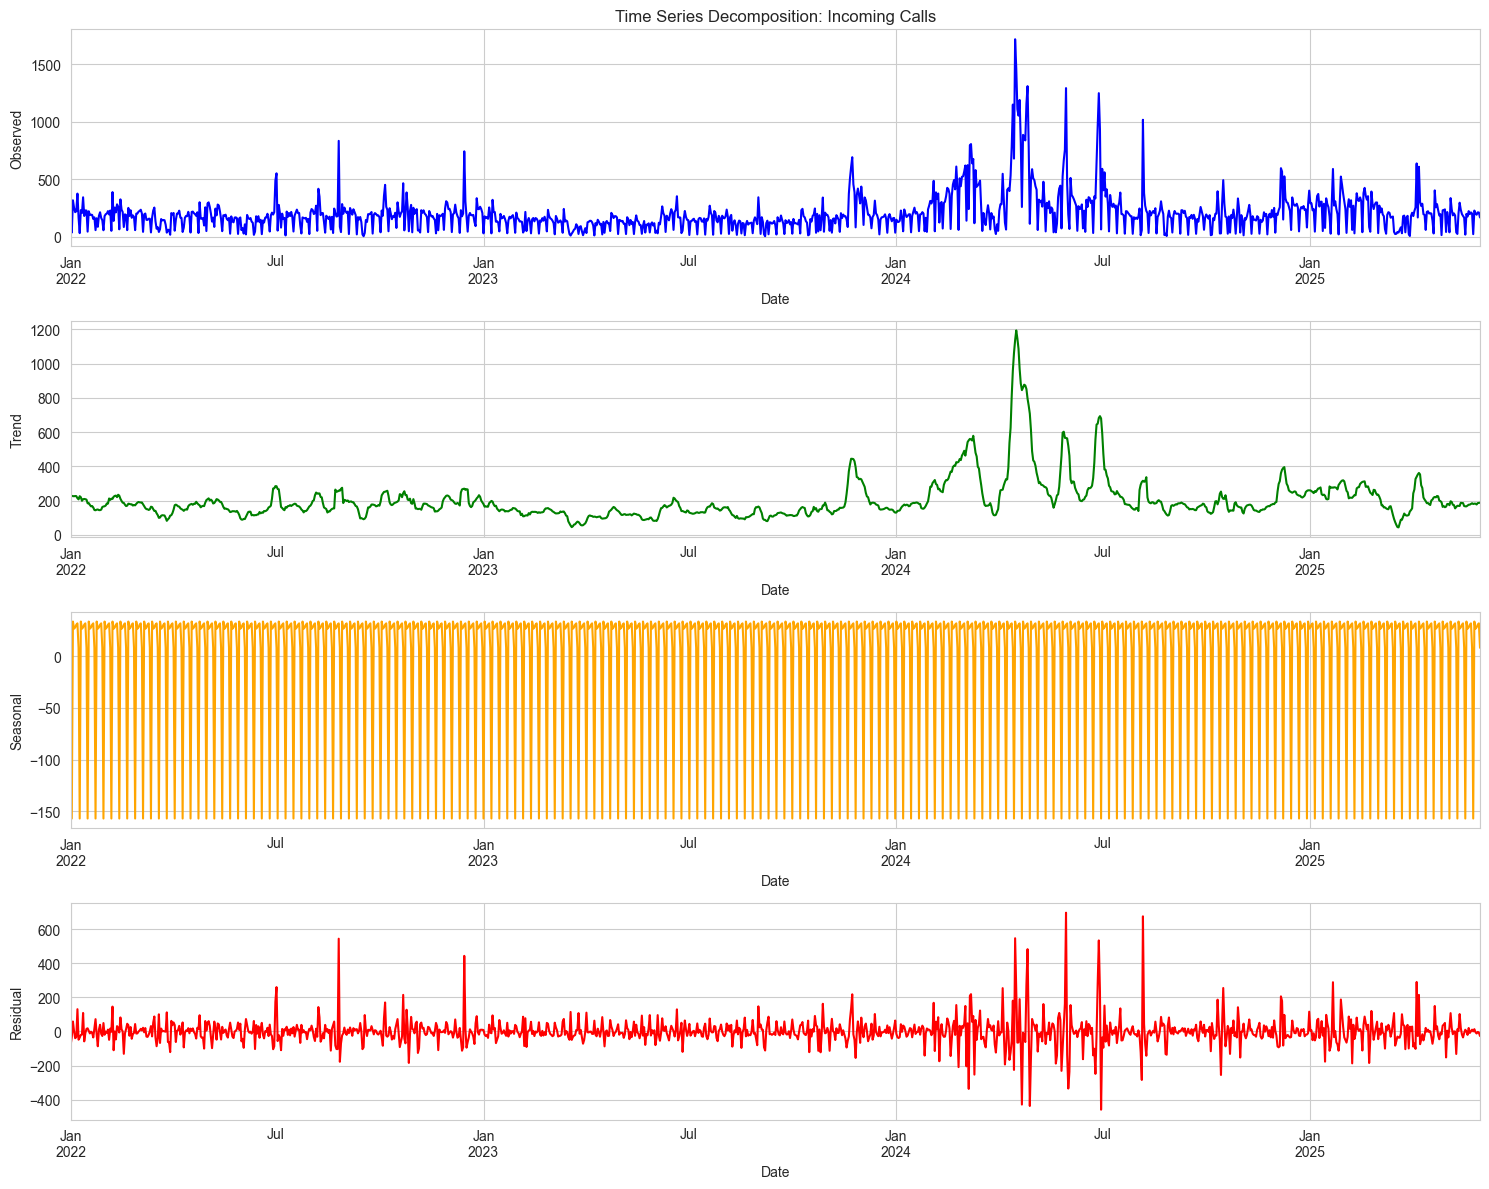

Decomposition Statistics for Incoming Calls:
Trend range: 43.14 to 1193.29
Seasonal range: -156.81 to 33.24
Residual std: 79.48


In [ ]:
# Perform seasonal decomposition for Incoming Calls
# Using weekly period (7 days) as we expect weekly patterns
decomposition_calls = seasonal_decompose(
    df["Incoming Calls"], model="additive", period=7, extrapolate_trend="freq"
)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original data
df["Incoming Calls"].plot(ax=axes[0], color="blue")
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition: Incoming Calls")

# Trend
decomposition_calls.trend.plot(ax=axes[1], color="green")
axes[1].set_ylabel("Trend")

# Seasonal
decomposition_calls.seasonal.plot(ax=axes[2], color="orange")
axes[2].set_ylabel("Seasonal")

# Residual
decomposition_calls.resid.plot(ax=axes[3], color="red")
axes[3].set_ylabel("Residual")

plt.tight_layout()
plt.show()

# Print decomposition statistics
print("Decomposition Statistics for Incoming Calls:")

trend_min = decomposition_calls.trend.min()
trend_max = decomposition_calls.trend.max()
print(f"Trend range: {trend_min:.2f} to {trend_max:.2f}")

seasonal_min = decomposition_calls.seasonal.min()
seasonal_max = decomposition_calls.seasonal.max()
print(f"Seasonal range: {seasonal_min:.2f} to {seasonal_max:.2f}")

print(f"Residual std: {decomposition_calls.resid.std():.2f}")

### 7.2 Decomposition of Talk Duration

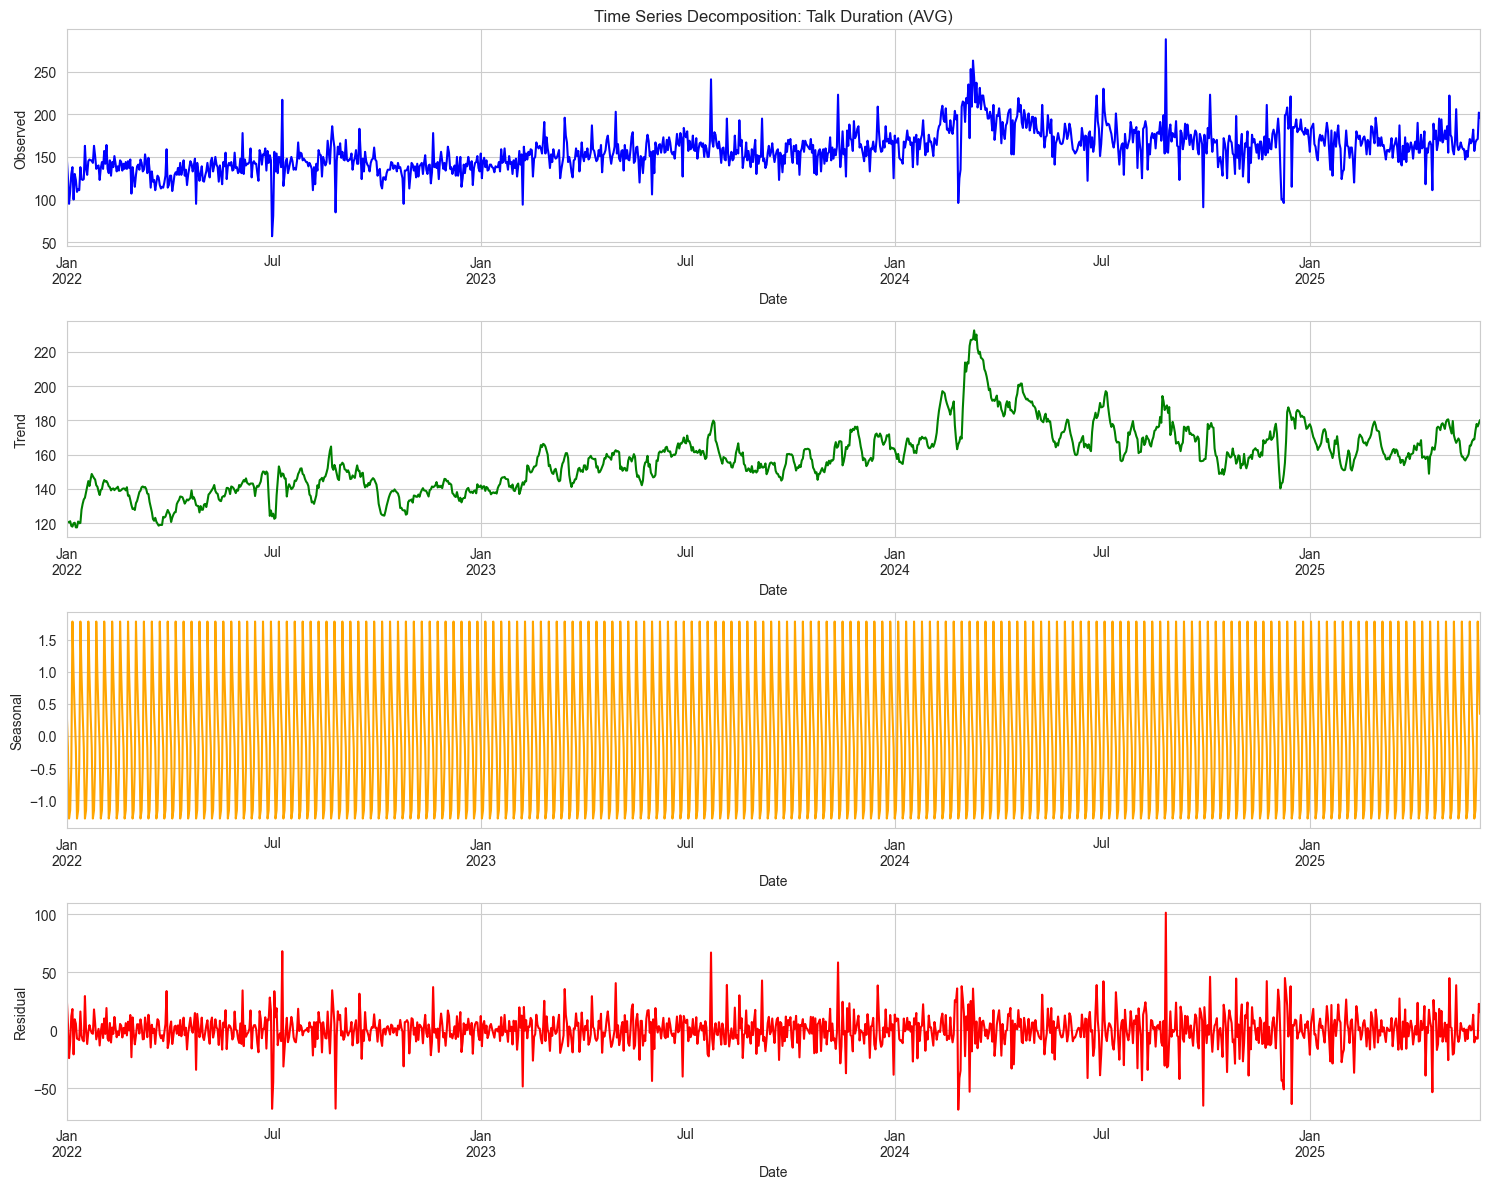

Decomposition Statistics for Talk Duration:
Trend range: 117.57 to 232.43 seconds
Seasonal range: -1.29 to 1.78 seconds
Residual std: 14.55 seconds


In [17]:
# Perform seasonal decomposition for Talk Duration
decomposition_talk = seasonal_decompose(
    df["Talk Duration (AVG)"],
    model="additive",
    period=7,
    extrapolate_trend="freq",
)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original data
df["Talk Duration (AVG)"].plot(ax=axes[0], color="blue")
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition: Talk Duration (AVG)")

# Trend
decomposition_talk.trend.plot(ax=axes[1], color="green")
axes[1].set_ylabel("Trend")

# Seasonal
decomposition_talk.seasonal.plot(ax=axes[2], color="orange")
axes[2].set_ylabel("Seasonal")

# Residual
decomposition_talk.resid.plot(ax=axes[3], color="red")
axes[3].set_ylabel("Residual")

plt.tight_layout()
plt.show()

print("Decomposition Statistics for Talk Duration:")
print(
    f"Trend range: {decomposition_talk.trend.min():.2f} to {decomposition_talk.trend.max():.2f} seconds"
)
print(
    f"Seasonal range: {decomposition_talk.seasonal.min():.2f} to {decomposition_talk.seasonal.max():.2f} seconds"
)
print(f"Residual std: {decomposition_talk.resid.std():.2f} seconds")

## 8. Seasonality Analysis

### 8.1 Day of Week Patterns

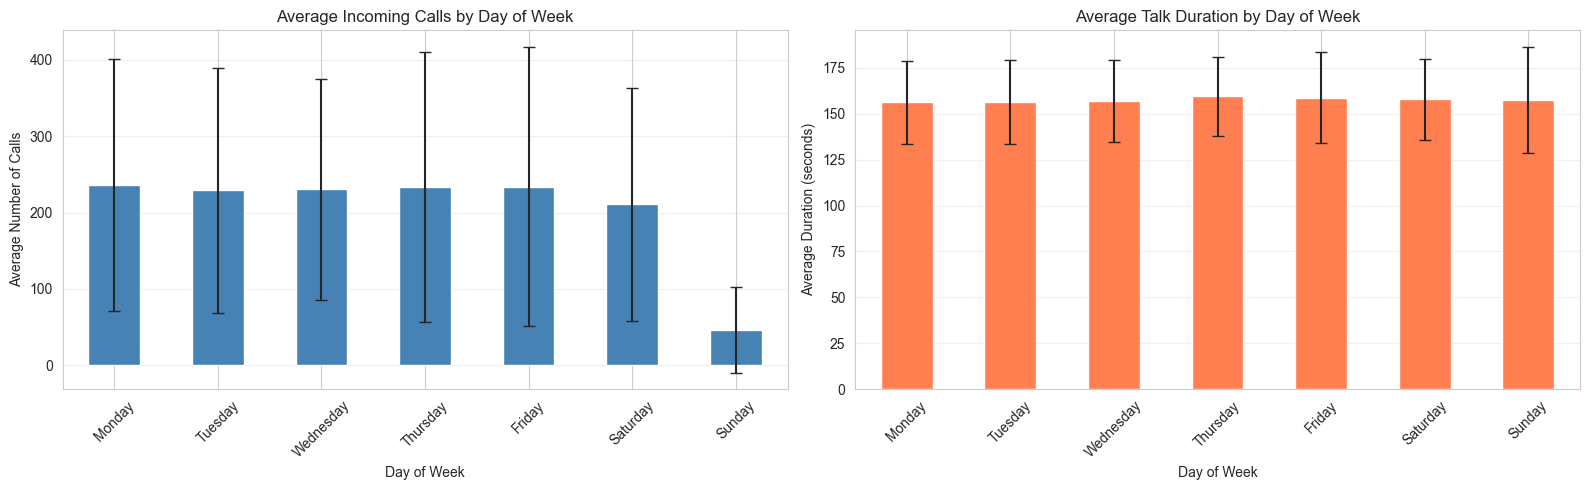

Statistical Summary by Day of Week:

Incoming Calls:
             mean     std
DayName                  
Monday     235.95  164.90
Tuesday    228.91  159.96
Wednesday  230.19  145.28
Thursday   232.84  176.93
Friday     234.05  183.29
Saturday   210.56  152.52
Sunday      45.91   55.89

Talk Duration (seconds):
             mean    std
DayName                 
Monday     156.22  22.78
Tuesday    156.44  22.98
Wednesday  157.18  22.28
Thursday   159.46  21.65
Friday     158.69  24.85
Saturday   157.93  22.06
Sunday     157.31  28.85


In [18]:
# Create day of week features
df["DayOfWeek"] = df.index.dayofweek
df["DayName"] = df.index.day_name()
df["Month"] = df.index.month
df["MonthName"] = df.index.month_name()
df["Quarter"] = df.index.quarter
df["Year"] = df.index.year

# Analyze patterns by day of week
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Incoming Calls by Day of Week
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
calls_by_day = (
    df.groupby("DayName")["Incoming Calls"]
    .agg(["mean", "std"])
    .reindex(day_order)
)

calls_by_day["mean"].plot(
    kind="bar",
    ax=axes[0],
    color="steelblue",
    yerr=calls_by_day["std"],
    capsize=4,
)
axes[0].set_title("Average Incoming Calls by Day of Week")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Average Number of Calls")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(axis="y", alpha=0.3)

# Talk Duration by Day of Week
talk_by_day = (
    df.groupby("DayName")["Talk Duration (AVG)"]
    .agg(["mean", "std"])
    .reindex(day_order)
)

talk_by_day["mean"].plot(
    kind="bar", ax=axes[1], color="coral", yerr=talk_by_day["std"], capsize=4
)
axes[1].set_title("Average Talk Duration by Day of Week")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Average Duration (seconds)")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

print("Statistical Summary by Day of Week:")
print("\nIncoming Calls:")
print(calls_by_day)
print("\nTalk Duration (seconds):")
print(talk_by_day)

### 8.2 Monthly and Quarterly Patterns

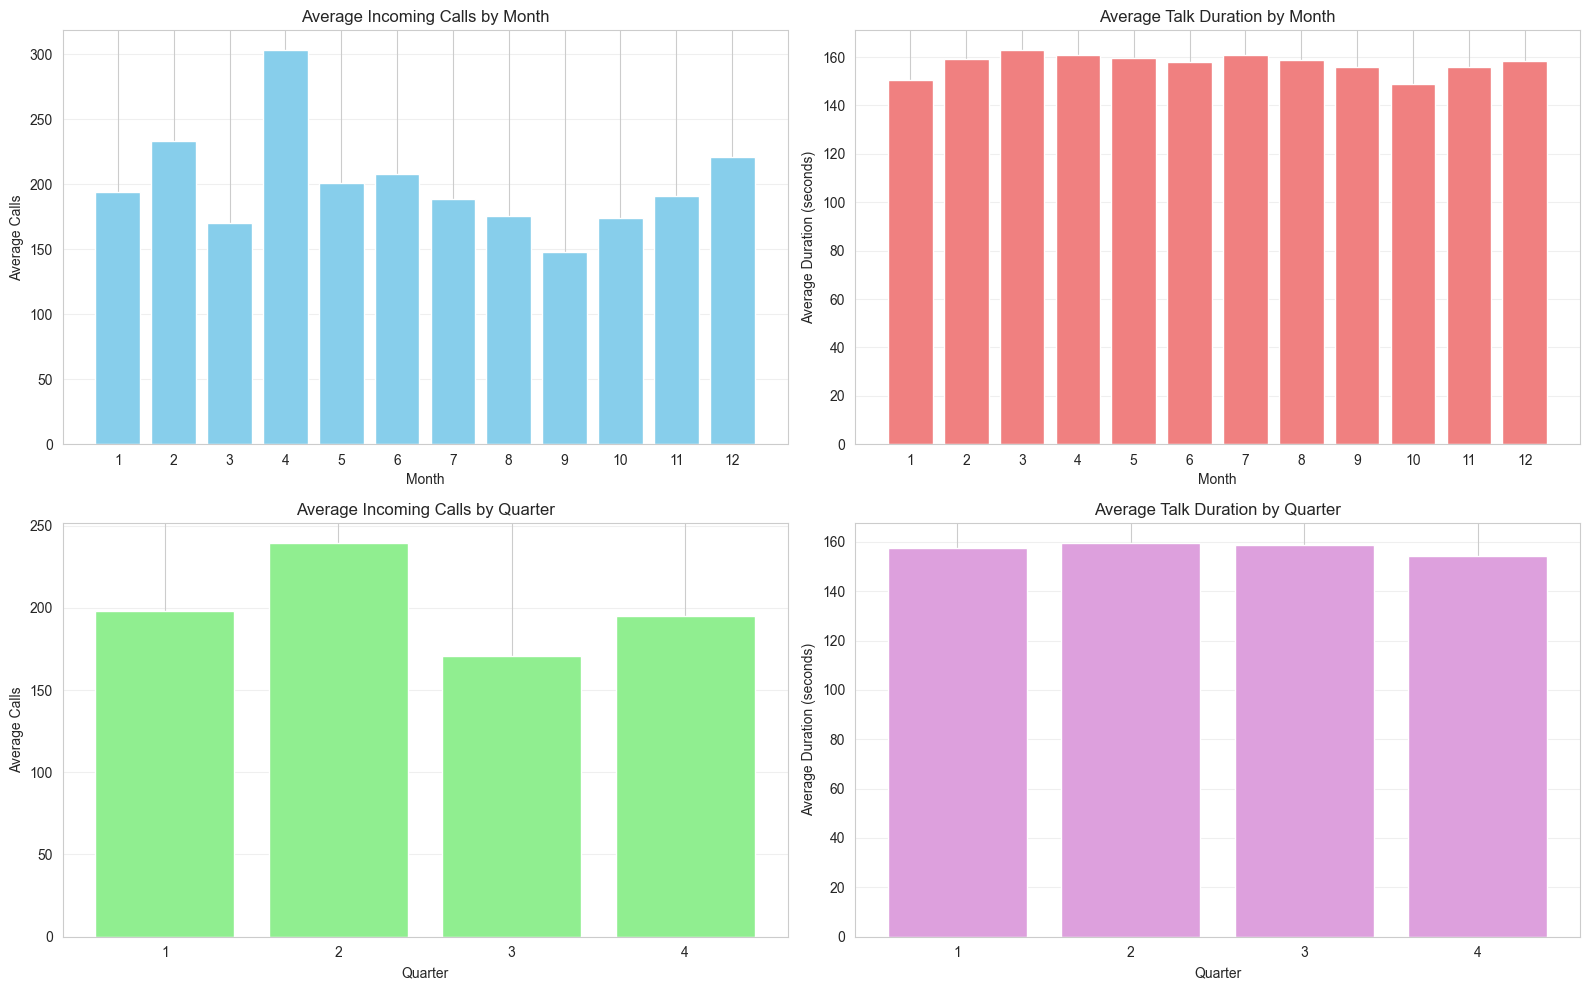

Summary by Month and Quarter:

=== By Month ===
       Incoming Calls  Talk Duration (AVG)
Month                                     
1              194.37               150.59
2              233.35               159.31
3              170.34               162.89
4              303.27               161.00
5              201.07               159.44
6              207.94               158.16
7              188.80               160.80
8              175.57               158.73
9              147.68               155.91
10             174.10               148.96
11             190.64               155.71
12             220.73               158.26

=== By Quarter ===
         Incoming Calls  Talk Duration (AVG)
Quarter                                     
1                198.32               157.54
2                239.64               159.66
3                170.93               158.51
4                195.21               154.29


In [19]:
# Analyze patterns by month and quarter
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Incoming Calls by Month
calls_by_month = df.groupby("Month")["Incoming Calls"].mean()
axes[0, 0].bar(calls_by_month.index, calls_by_month.values, color="skyblue")
axes[0, 0].set_title("Average Incoming Calls by Month")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Average Calls")
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(axis="y", alpha=0.3)

# Talk Duration by Month
talk_by_month = df.groupby("Month")["Talk Duration (AVG)"].mean()
axes[0, 1].bar(talk_by_month.index, talk_by_month.values, color="lightcoral")
axes[0, 1].set_title("Average Talk Duration by Month")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Average Duration (seconds)")
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(axis="y", alpha=0.3)

# Incoming Calls by Quarter
calls_by_quarter = df.groupby("Quarter")["Incoming Calls"].mean()
axes[1, 0].bar(
    calls_by_quarter.index, calls_by_quarter.values, color="lightgreen"
)
axes[1, 0].set_title("Average Incoming Calls by Quarter")
axes[1, 0].set_xlabel("Quarter")
axes[1, 0].set_ylabel("Average Calls")
axes[1, 0].set_xticks(range(1, 5))
axes[1, 0].grid(axis="y", alpha=0.3)

# Talk Duration by Quarter
talk_by_quarter = df.groupby("Quarter")["Talk Duration (AVG)"].mean()
axes[1, 1].bar(talk_by_quarter.index, talk_by_quarter.values, color="plum")
axes[1, 1].set_title("Average Talk Duration by Quarter")
axes[1, 1].set_xlabel("Quarter")
axes[1, 1].set_ylabel("Average Duration (seconds)")
axes[1, 1].set_xticks(range(1, 5))
axes[1, 1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

print("Summary by Month and Quarter:")
print("\n=== By Month ===")
print(df.groupby("Month")[["Incoming Calls", "Talk Duration (AVG)"]].mean())
print("\n=== By Quarter ===")
print(df.groupby("Quarter")[["Incoming Calls", "Talk Duration (AVG)"]].mean())

### 8.3 Heatmap: Day of Week vs Month Patterns

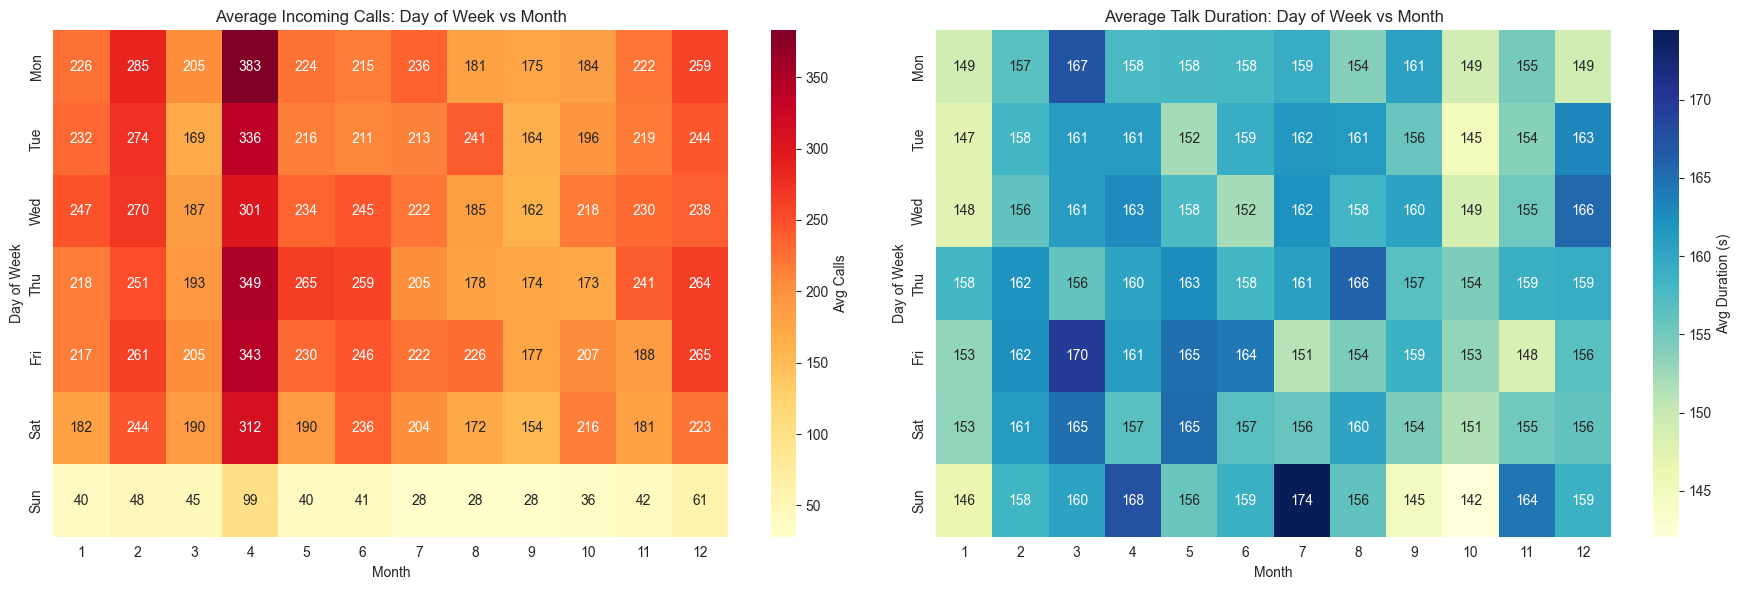

In [20]:
# Create heatmaps to visualize patterns across multiple dimensions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap: Incoming Calls by Day of Week and Month
pivot_calls = df.pivot_table(
    values="Incoming Calls", index="DayOfWeek", columns="Month", aggfunc="mean"
)
pivot_calls.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sns.heatmap(
    pivot_calls,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    ax=axes[0],
    cbar_kws={"label": "Avg Calls"},
)
axes[0].set_title("Average Incoming Calls: Day of Week vs Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Day of Week")

# Heatmap: Talk Duration by Day of Week and Month
pivot_talk = df.pivot_table(
    values="Talk Duration (AVG)",
    index="DayOfWeek",
    columns="Month",
    aggfunc="mean",
)
pivot_talk.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sns.heatmap(
    pivot_talk,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    ax=axes[1],
    cbar_kws={"label": "Avg Duration (s)"},
)
axes[1].set_title("Average Talk Duration: Day of Week vs Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Day of Week")

plt.tight_layout()
plt.show()

## 9. Stationarity Testing

Stationarity is crucial for time series modeling. A stationary series has constant mean, variance, and autocorrelation over time.

In [21]:
def test_stationarity(timeseries, title):
    """
    Perform ADF (Augmented Dickey-Fuller) and KPSS tests for stationarity
    """
    print(f"\n{'='*60}")
    print(f"Stationarity Tests for: {title}")
    print("=" * 60)

    # ADF Test
    adf_result = adfuller(timeseries.dropna(), autolag="AIC")
    print("\n--- Augmented Dickey-Fuller Test ---")
    print(f"ADF Statistic: {adf_result[0]:.6f}")
    print(f"p-value: {adf_result[1]:.6f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value:.3f}")

    if adf_result[1] <= 0.05:
        print("✓ Result: Series is STATIONARY (reject null hypothesis)")
    else:
        print(
            "✗ Result: Series is NON-STATIONARY (fail to reject null hypothesis)"
        )

    # KPSS Test
    kpss_result = kpss(timeseries.dropna(), regression="c", nlags="auto")
    print("\n--- KPSS Test ---")
    print(f"KPSS Statistic: {kpss_result[0]:.6f}")
    print(f"p-value: {kpss_result[1]:.6f}")
    print("Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"\t{key}: {value:.3f}")

    if kpss_result[1] >= 0.05:
        print(
            "✓ Result: Series is STATIONARY (fail to reject null hypothesis)"
        )
    else:
        print("✗ Result: Series is NON-STATIONARY (reject null hypothesis)")


# Test stationarity for both target variables
test_stationarity(df["Incoming Calls"], "Incoming Calls")
test_stationarity(df["Talk Duration (AVG)"], "Talk Duration (AVG)")


Stationarity Tests for: Incoming Calls

--- Augmented Dickey-Fuller Test ---
ADF Statistic: -5.197227
p-value: 0.000009
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
✓ Result: Series is STATIONARY (reject null hypothesis)

--- KPSS Test ---
KPSS Statistic: 0.913766
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
✗ Result: Series is NON-STATIONARY (reject null hypothesis)

Stationarity Tests for: Talk Duration (AVG)

--- Augmented Dickey-Fuller Test ---
ADF Statistic: -2.632842
p-value: 0.086398
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
✗ Result: Series is NON-STATIONARY (fail to reject null hypothesis)

--- KPSS Test ---
KPSS Statistic: 3.978589
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
✗ Result: Series is NON-STATIONARY (reject null hypothesis)


## 10. Autocorrelation Analysis (ACF & PACF)

Autocorrelation helps us understand the relationship between a time series and its lagged values, which is essential for model selection.

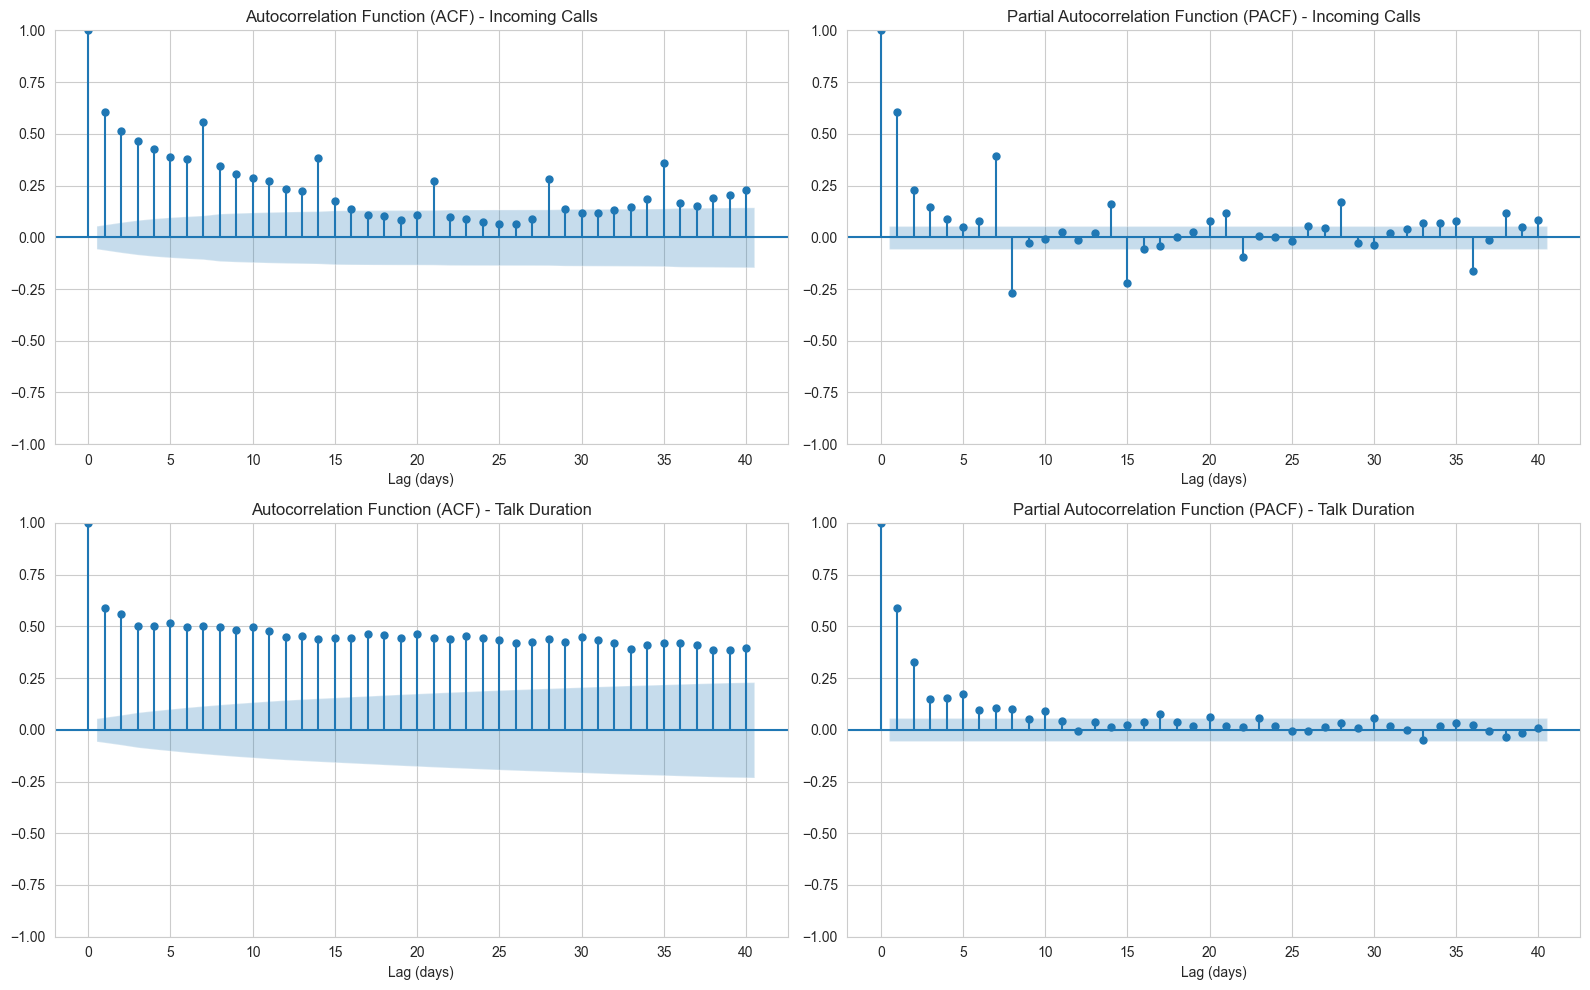

Key Insights from ACF/PACF:
- Significant spikes at lag 7, 14, 21 suggest weekly seasonality
- ACF gradually declining suggests potential trend component
- Use these plots to determine AR and MA parameters for ARIMA models


In [22]:
# ACF and PACF plots for Incoming Calls
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF for Incoming Calls
plot_acf(df["Incoming Calls"].dropna(), lags=40, ax=axes[0, 0])
axes[0, 0].set_title("Autocorrelation Function (ACF) - Incoming Calls")
axes[0, 0].set_xlabel("Lag (days)")

# PACF for Incoming Calls
plot_pacf(df["Incoming Calls"].dropna(), lags=40, ax=axes[0, 1])
axes[0, 1].set_title(
    "Partial Autocorrelation Function (PACF) - Incoming Calls"
)
axes[0, 1].set_xlabel("Lag (days)")

# ACF for Talk Duration
plot_acf(df["Talk Duration (AVG)"].dropna(), lags=40, ax=axes[1, 0])
axes[1, 0].set_title("Autocorrelation Function (ACF) - Talk Duration")
axes[1, 0].set_xlabel("Lag (days)")

# PACF for Talk Duration
plot_pacf(df["Talk Duration (AVG)"].dropna(), lags=40, ax=axes[1, 1])
axes[1, 1].set_title("Partial Autocorrelation Function (PACF) - Talk Duration")
axes[1, 1].set_xlabel("Lag (days)")

plt.tight_layout()
plt.show()

print("Key Insights from ACF/PACF:")
print("- Significant spikes at lag 7, 14, 21 suggest weekly seasonality")
print("- ACF gradually declining suggests potential trend component")
print("- Use these plots to determine AR and MA parameters for ARIMA models")

## 11. Rolling Statistics Analysis

Visualize how mean and standard deviation change over time using rolling windows.

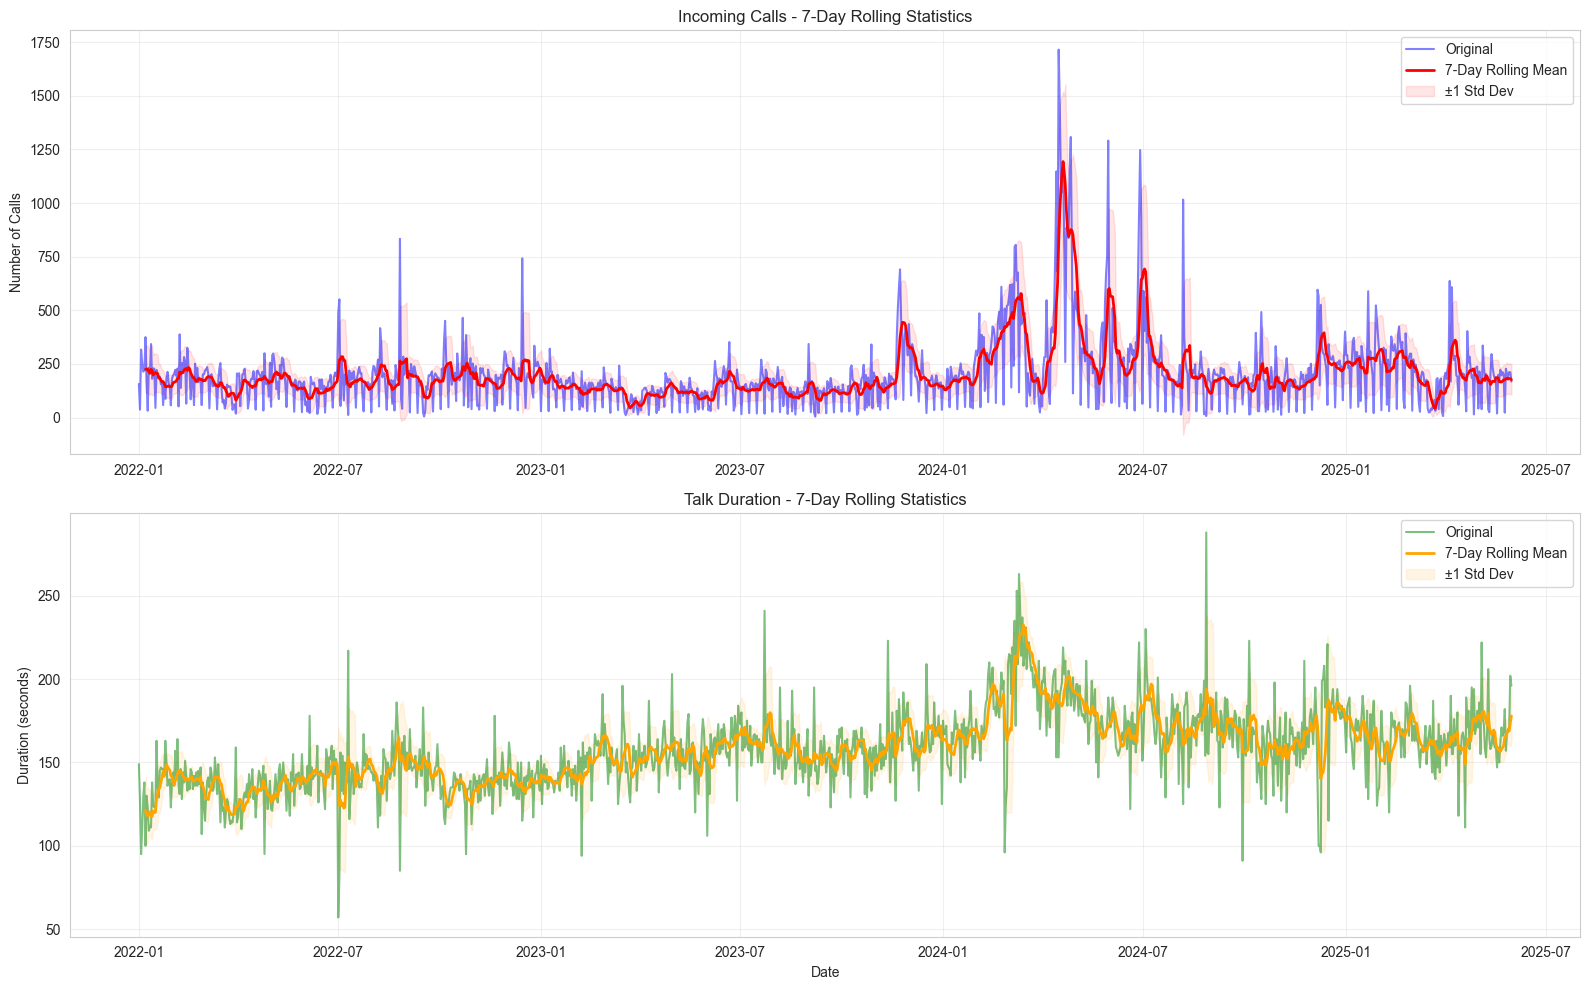

Rolling Statistics Summary:
Window size: 7 days

Incoming Calls - Coefficient of Variation (CV): 0.475
Talk Duration - Coefficient of Variation (CV): 0.089


In [23]:
# Calculate rolling statistics
window_size = 7  # 7-day rolling window

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Incoming Calls - Rolling Statistics
rolling_mean_calls = df["Incoming Calls"].rolling(window=window_size).mean()
rolling_std_calls = df["Incoming Calls"].rolling(window=window_size).std()

axes[0].plot(
    df.index, df["Incoming Calls"], color="blue", label="Original", alpha=0.5
)
axes[0].plot(
    df.index,
    rolling_mean_calls,
    color="red",
    label=f"{window_size}-Day Rolling Mean",
    linewidth=2,
)
axes[0].fill_between(
    df.index,
    rolling_mean_calls - rolling_std_calls,
    rolling_mean_calls + rolling_std_calls,
    color="red",
    alpha=0.1,
    label="±1 Std Dev",
)
axes[0].set_title(f"Incoming Calls - {window_size}-Day Rolling Statistics")
axes[0].set_ylabel("Number of Calls")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Talk Duration - Rolling Statistics
rolling_mean_talk = (
    df["Talk Duration (AVG)"].rolling(window=window_size).mean()
)
rolling_std_talk = df["Talk Duration (AVG)"].rolling(window=window_size).std()

axes[1].plot(
    df.index,
    df["Talk Duration (AVG)"],
    color="green",
    label="Original",
    alpha=0.5,
)
axes[1].plot(
    df.index,
    rolling_mean_talk,
    color="orange",
    label=f"{window_size}-Day Rolling Mean",
    linewidth=2,
)
axes[1].fill_between(
    df.index,
    rolling_mean_talk - rolling_std_talk,
    rolling_mean_talk + rolling_std_talk,
    color="orange",
    alpha=0.1,
    label="±1 Std Dev",
)
axes[1].set_title(f"Talk Duration - {window_size}-Day Rolling Statistics")
axes[1].set_ylabel("Duration (seconds)")
axes[1].set_xlabel("Date")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Rolling Statistics Summary:")
print(f"Window size: {window_size} days")
print(
    f"\nIncoming Calls - Coefficient of Variation (CV): {(rolling_std_calls.mean() / rolling_mean_calls.mean()):.3f}"
)
print(
    f"Talk Duration - Coefficient of Variation (CV): {(rolling_std_talk.mean() / rolling_mean_talk.mean()):.3f}"
)